# Airbnb Seattle Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [7]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Q1-> How many days in a year homes are available for rent in Seattle?

### Now we start data cleaning.

In [9]:
# Change the available column to boolean type.
calendar['available'].replace('t',True, inplace=True)
calendar['available'].replace('f',False, inplace=True)

In [10]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,$85.00
1,241032,2016-01-05,True,$85.00
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [11]:
# Calculate poportion of how many days the house is available/unavailable in a year.
house_filled = calendar.groupby('listing_id').mean()['available'].reset_index()

# To check availabiity of the house we only need listing_id & days_available columns i.e we only keep them.
house_filled.columns = ['listing_id', 'days_available_prob']
house_filled['days_unavailable_prob'] = 1 - house_filled['days_available_prob']

In [12]:
house_filled.head()

,listing_id,days_available_prob,days_unavailable_prob
0,3335,0.846575,0.153425
1,4291,1.000000,0.000000
2,5682,0.846575,0.153425
3,6606,1.000000,0.000000
4,7369,0.145205,0.854795


         listing_id  days_available_prob  days_unavailable_prob
count  3.818000e+03          3818.000000            3818.000000
mean   5.550111e+06             0.670610               0.329390
std    2.962660e+06             0.347322               0.347322
min    3.335000e+03             0.000000               0.000000
25%    3.258256e+06             0.339726               0.013699
50%    6.118244e+06             0.843836               0.156164
75%    8.035127e+06             0.986301               0.660274
max    1.034016e+07             1.000000               1.000000


Text(0.5, 0, 'Percentage of Days Homes are Available')

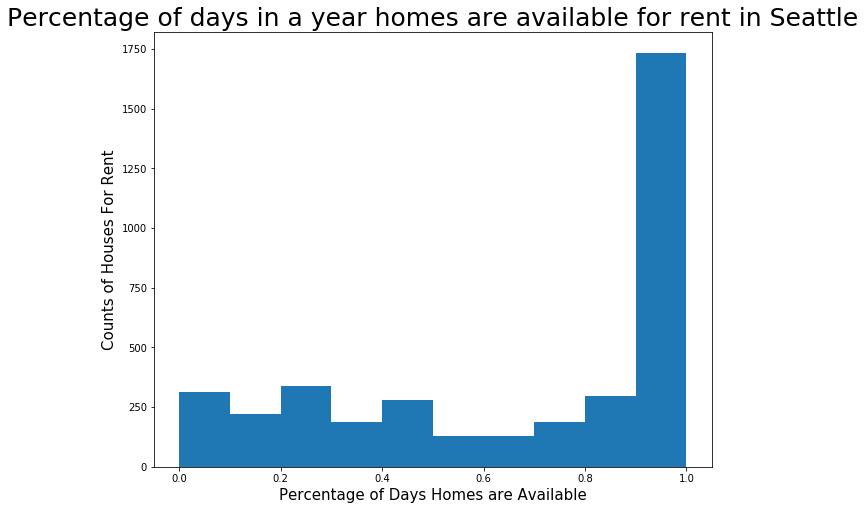

In [14]:
# Complete Seattle Information.
print(house_filled.describe())

# Its Histogram.
house_filled['days_available_prob'].hist(figsize=(10,8), bins=10,grid=False )
plt.title('Percentage of days in a year homes are available for rent in Seattle', fontdict={'fontsize': 25})
plt.ylabel('Counts of Houses For Rent',fontdict={'fontsize': 15})
plt.xlabel('Percentage of Days Homes are Available',fontdict={'fontsize': 15})

## Q2-> What's the trend of house renting in Seattle?

In [15]:
# Percentage of available homes per day in Seattle.
avail_homes_perday = calendar.groupby('date').mean()['available']
avail_homes_perday = avail_homes_perday.reset_index()
avail_homes_perday.head()

,date,available
0,2016-01-04,0.454426
1,2016-01-05,0.488999
2,2016-01-06,0.478261
3,2016-01-07,0.465165
4,2016-01-08,0.466737


Text(0, 0.5, 'Percentage of Available Houses')

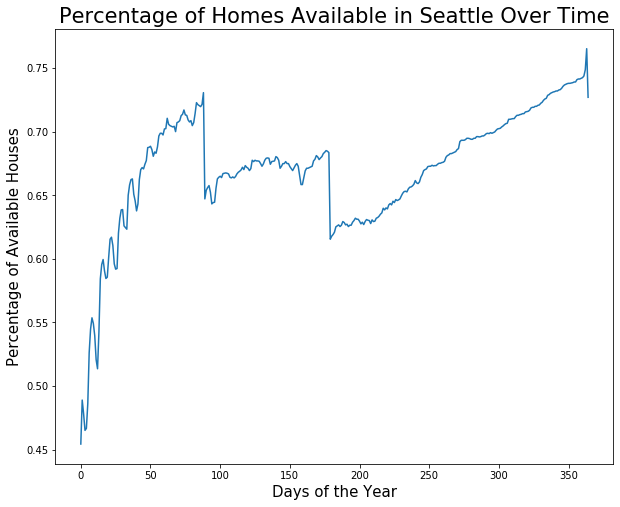

In [16]:
# Plotting the trend here.
avail_homes_perday['available'].plot( figsize=(10,8))
plt.title('Percentage of Homes Available in Seattle Over Time',fontdict={'fontsize': 21})
plt.xlabel('Days of the Year',fontdict={'fontsize': 15})
plt.ylabel('Percentage of Available Houses',fontdict={'fontsize': 15})

## Q3-> What's the renting charges of houses in the Seattle?

In [17]:
# First we need to clean the price data as it is in $ and also have some NaN values in it.
calendar['newprice'] = calendar['price'].apply(lambda x: float(str(x).replace('$','').replace(',','')))

In [18]:
calendar.head()

,listing_id,date,available,price,newprice
0,241032,2016-01-04,True,$85.00,85.0
1,241032,2016-01-05,True,$85.00,85.0
2,241032,2016-01-06,False,NaN,NaN
3,241032,2016-01-07,False,NaN,NaN
4,241032,2016-01-08,False,NaN,NaN


In [19]:
# Just check how many values are unique after "$ 1K". 
calendar['newprice'][calendar['newprice'] > 1000].value_counts()

1099.0    120
1650.0     91
1199.0     71
1450.0     28
1250.0     15
1240.0      2
Name: newprice, dtype: int64

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: newprice, dtype: float64


Text(0, 0.5, 'Count of Houses for Renting')

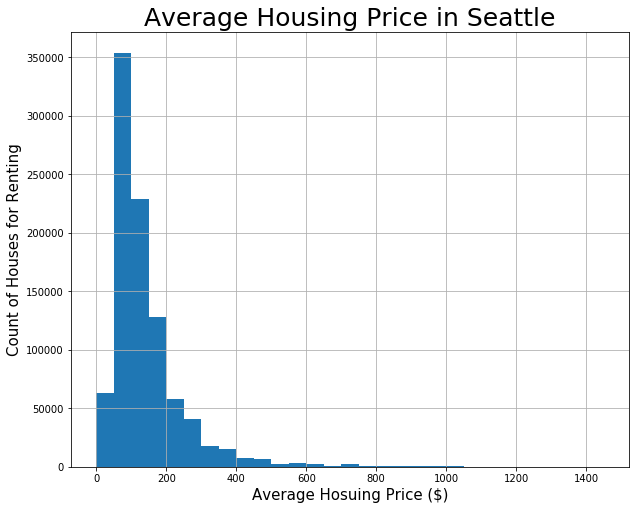

In [20]:
# Housing Prices for Seattle.
print(calendar['newprice'].describe())

# Now we plot the prices less than 1500 because after $1450 we only have $1650 in the data set.
calendar['newprice'] [calendar['newprice'] < 1500].hist(bins=np.arange(0,1500,50),figsize=(10,8))  
plt.title('Average Housing Price in Seattle',fontdict={'fontsize': 25})
plt.xlabel('Average Hosuing Price ($)',fontdict={'fontsize': 15})
plt.ylabel('Count of Houses for Renting',fontdict={'fontsize': 15})

## Q4-> What's the trend of pricing through the whole year in Seattle?

In [22]:
calendar.head()

,listing_id,date,available,price,newprice
0,241032,2016-01-04,True,$85.00,85.0
1,241032,2016-01-05,True,$85.00,85.0
2,241032,2016-01-06,False,NaN,NaN
3,241032,2016-01-07,False,NaN,NaN
4,241032,2016-01-08,False,NaN,NaN


In [23]:
# Perpare the data for plotting the trend.
price_perday = calendar.groupby('date').mean()['newprice']
price_perday = price_perday.reset_index()

price_perday['date'] = pd.to_datetime(price_perday['date'])

price_perday.head()

,date,newprice
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853


Text(0, 0.5, 'Average Pricing of Available Houses($)')

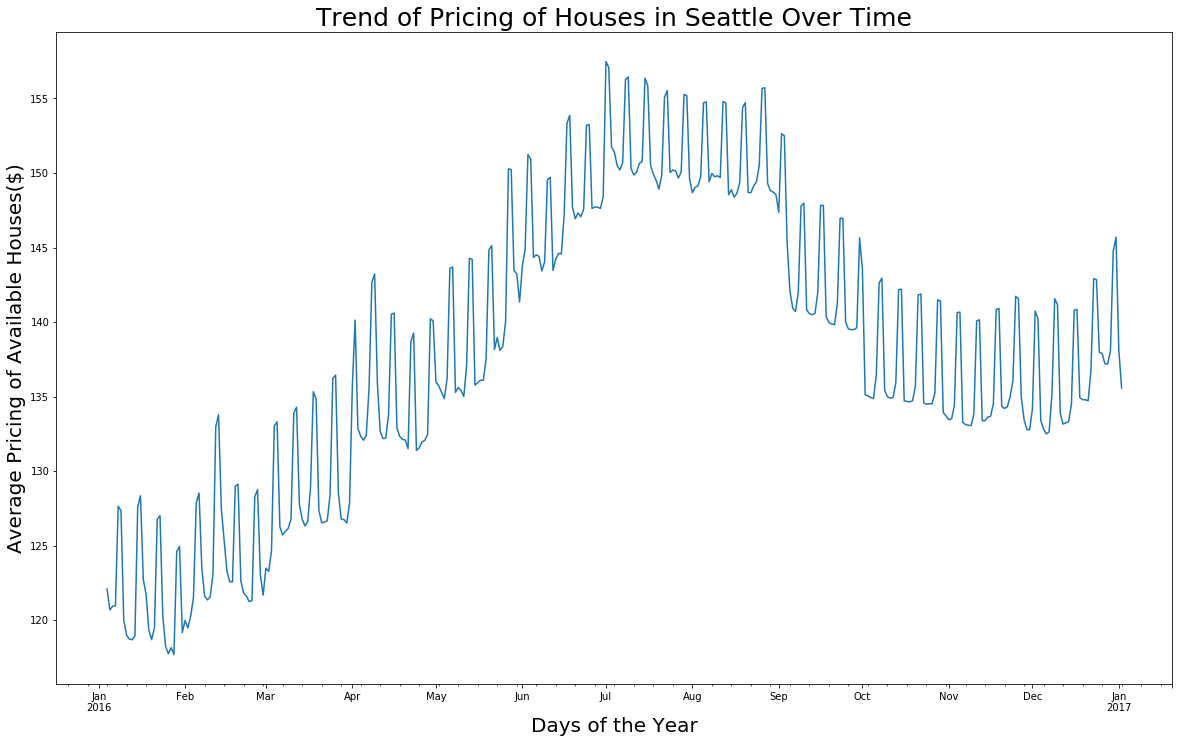

In [26]:
# Now plotting the trend here.
price_perday.set_index('date')['newprice'].plot(figsize=(20,12));
#plt.plot(price_perday['newprice'])
plt.title('Trend of Pricing of Houses in Seattle Over Time',fontdict={'fontsize': 25} )
plt.xlabel('Days of the Year',fontdict={'fontsize': 20})
plt.ylabel('Average Pricing of Available Houses($)',fontdict={'fontsize': 20})